## 3821Б1ПР1 Кашин Степан

# 8. Плохо обусловленные матрицы

Провести серию экспериментов, тестирующую команды `scipy.linalg.solve`, `numpy.linalg.cond`
на плохо обусловленных матрицах вида
$A=LU$, где $L$, $U$ – случайные нижняя треугольная и верхняя треугольная
матрицы соответственно с малыми диагональными элементами.

Экспериментальным путем для каждого из перечисленных классов установить
диапазон изменения порядка матрицы, при котором число обусловленности не
превосходит ведичины порядка $10^{16}$. Построить графики значений,
выдаваемых функцией `scipy.linalg.cond`. Построить графики используемого этими функциями времени. Для каждой
матрицы задать случайно решение $x$. По матрице $A$ и решению $x$
сгенерировать правую часть системы линейных уравнений $b$. Решить систему
$Ax=b$, используя `scipy.linalg.solve`. Построить графики относительной ошибки
решения и невязки. Объяснить результаты.

Перед началом выполнения работы импортируем все неебходимые для работы библиотеки и задаём переменные которые будут использоваться на протяжение всей программы

In [40]:
from numpy.linalg import cond, norm 
from scipy.linalg import solve
import matplotlib.pyplot
import numpy
import time

littel=10 # задает порядок малости диагональных элементов
percCond=[] # список, в котором хранятся результаты проверки на 10^16
condGraf=[] # список чисел обусловленности
timeCond=[] # список, в котором хранится время выполнения функции numpy.linalg.cond
nvList=[] # список неувязок
misteces=[] # список относительных ошибок решения

Импортируем функции `cornd,norm` из `numpy.linalg` теперь к ним можно обращаться напрямую (`cond, norm`), так-же `solve`
Импортируем библиотеки `matplotlib.pyplot` и `numpy`

`littel` - задает порядок малости диагональных элементов 

`percCond` - список, в котором хранятся результаты проверки на >$10^{16}$

`condGraf` - список чисел обусловленности


`timeCond` - список, в котором хранится время выполнения функции `numpy.linalg.cond`

`nvList` - список неувязок

`misteces` - список относительных ошибок решения

Проведём исследование на матрицах n порадка где n $1\le n
\le 9$. Программа будет генерировать треугольные матрицы $U$,$L$,диоганальные элементы в которых будут маыми, поэтому разделим эти элементы на некую величину. После этого мы получим матрицу через произведение матриц $L$ и $U$ `A=L.dot(U)`. 

После получение матрицы $A$ оцениваем время работы `numpy.linalg.cond`и порядок числа обусловленности.

Далее Формируется вектор $B$ на основе соотношения $AX=B$  `b=a.dot(x)`, где $X$ - случайно сгенерированный вектор.


In [41]:
for N in range(1, 10):
    U = numpy.triu(numpy.random.rand(N, N))
    L = numpy.tril(numpy.random.rand(N, N))
    
    for i in range(N):
        U[i][i] = U[i][i] / littel
        L[i][i] = L[i][i] / littel
        
    A = L.dot(U)
    
    
    FirstTime = time.time() #засекаем время на начало работы numpy.linalg.cond
    
    for i in range(10**3):
        cond_a=cond(A)
        
    RealTime=time.time()-FirstTime # получаем время работы numpy.linalg.cond вычив из текущего времени время на начало работы numpy.linalg.cond  
    timeCond.append(RealTime)
    
    # Оцениваем порядок числа обусловленности
    if cond_a>10**16:
        percCond.append("{} -> Превосходит".format(N))
    else:
        percCond.append("{} -> Не превосходит".format(N))    
    condGraf.append(cond_a)#Число обусловленности print(cond_a) 
    
    
    X=numpy.random.rand(N) #Генирируем случайное решение X
    B=A.dot(X)
    
    X1=solve(A,B)
    
    norm_nvList=norm(X1-X)
    nvList.append(norm_nvList)
    norm_misteces=norm_nvList/norm(X)
    misteces.append(norm_misteces)   

C:\Users\BD9E~1\AppData\Local\Temp/ipykernel_21968/2196005549.py:31: LinAlgWarning: Ill-conditioned matrix (rcond=3.07958e-17): result may not be accurate.
  X1=solve(A,B)
C:\Users\BD9E~1\AppData\Local\Temp/ipykernel_21968/2196005549.py:31: LinAlgWarning: Ill-conditioned matrix (rcond=3.78554e-19): result may not be accurate.
  X1=solve(A,B)
C:\Users\BD9E~1\AppData\Local\Temp/ipykernel_21968/2196005549.py:31: LinAlgWarning: Ill-conditioned matrix (rcond=1.26619e-20): result may not be accurate.
  X1=solve(A,B)


Оценим превосходство числа $10^{16}$

In [42]:
print(percCond) 

['1 -> Не превосходит', '2 -> Не превосходит', '3 -> Не превосходит', '4 -> Не превосходит', '5 -> Не превосходит', '6 -> Не превосходит', '7 -> Превосходит', '8 -> Превосходит', '9 -> Превосходит']


1) График чисел обусловленности `condGraf`.

2) График относительная ошибок `misteces`.

3) График временной зависимости `timeCond`.

4) График невязки `nvList`

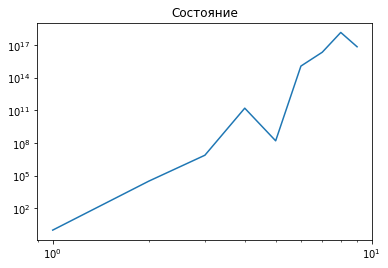

In [43]:
Xline=list(range(1,10))
matplotlib.pyplot.title('Состояние')
matplotlib.pyplot.loglog(Xline, condGraf)

2) Построим график относительной ошибки решения. Мы видим, что график относительных ошибок решения, является показательной функцией относительно порядка матрицы

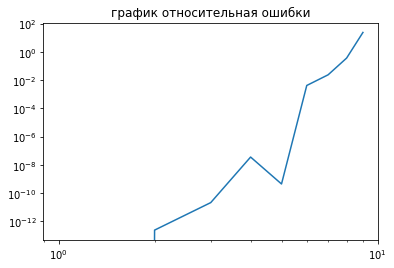

In [44]:
matplotlib.pyplot.title('график относительная ошибки')
matplotlib.pyplot.loglog(Xline,misteces)

3) Построим график зависимости времении `timeCond` выполнения функции `numpy.linalg.cond` к порядоку матрицы. При рассмотрении графика можно заметить линейную зависимость.

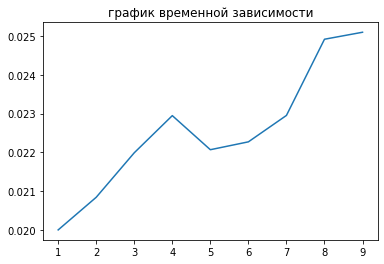

In [45]:
matplotlib.pyplot.title('график временной зависимости')
matplotlib.pyplot.plot(Xline, timeCond)

4)Построим график функция невязки `nvList`. Из графика мы видим, что невязка `nvList`, является показательной функцией относительно порядка матрицы и в точности посторяет график относительных ошибок `misteces`.

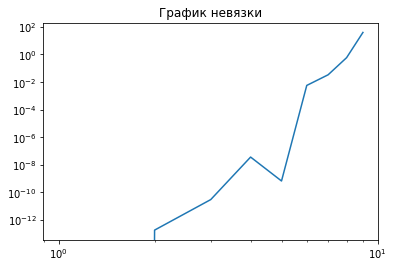

In [47]:
matplotlib.pyplot.title('График невязки')
matplotlib.pyplot.loglog(Xline, nvList)